In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('edgeslist.csv')

In [3]:
df

,Source,Destination,Weight
0,A,E,3.5
1,A,F,2.1
2,A,E,1.8
3,B,C,4.2
4,B,D,2.5
5,C,D,2.9
6,C,F,1.7
7,D,G,3.0
8,D,H,3.3
9,E,A,2.4


In [4]:
len(df)

35

In [5]:
'''edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))'''

"edges=[]\nfor i in range(len(df)):\n    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))"

In [6]:
def undirected_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d["weight"] for u,v,d in G.edges(data=True)})
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()
    nodes=list(G.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(G.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('Degree of nodes:-\n',G.degree( weight='weight'))
    degree=dict(G.degree( weight='weight'))
    degree_max=max(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_max}
    print("max degree node:",value)
    degree_min=min(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_min}
    print("min degree node:",value)

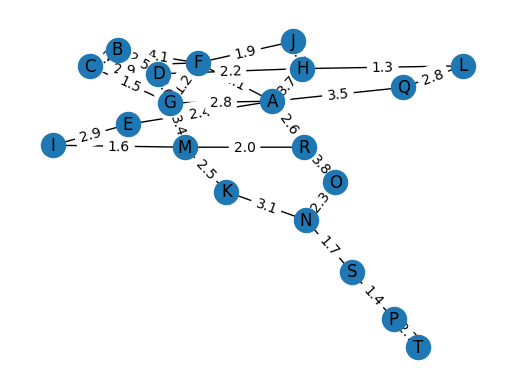

Nodes of the above graph are:-
 ['A', 'E', 'F', 'B', 'C', 'D', 'G', 'H', 'I', 'M', 'J', 'K', 'N', 'L', 'Q', 'R', 'S', 'O', 'P', 'T']
Total no of Nodes are:- 20
Edges of the above graph are:-
 [('A', 'E'), ('A', 'F'), ('A', 'G'), ('A', 'H'), ('A', 'Q'), ('A', 'R'), ('E', 'I'), ('F', 'C'), ('F', 'G'), ('F', 'B'), ('F', 'J'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'G'), ('D', 'G'), ('D', 'H'), ('G', 'M'), ('H', 'J'), ('H', 'L'), ('I', 'M'), ('M', 'K'), ('M', 'R'), ('K', 'N'), ('N', 'S'), ('N', 'O'), ('L', 'Q'), ('R', 'O'), ('S', 'P'), ('P', 'T')]
Total no of Edges are:-
 30
Degree of nodes:-
 [('A', 17.1), ('E', 5.3), ('F', 11.0), ('B', 10.8), ('C', 10.299999999999999), ('D', 10.600000000000001), ('G', 11.9), ('H', 10.5), ('I', 4.5), ('M', 9.5), ('J', 5.199999999999999), ('K', 5.6), ('N', 7.1), ('L', 4.1), ('Q', 6.3), ('R', 8.4), ('S', 3.0999999999999996), ('O', 6.1), ('P', 4.1), ('T', 2.7)]
max degree node: {'A'}
min degree node: {'T'}


In [7]:
undirected_graph(df)

In [8]:
def directed_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    pos = nx.spring_layout(H)  # Position the nodes using a spring layout algorithm
    nx.draw(H, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.9)
    nx.draw_networkx_edge_labels(H, pos, edge_labels={(u, v): d['weight'] for u, v, d in H.edges(data=True)}, font_size=8, font_color='black')  # Draw edge labels
    plt.show()
    nodes=list(H.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(H.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('out Degree',H.out_degree( weight='weight'))
    print('in Degree',H.in_degree( weight='weight'))
    degree=dict(H.degree( weight='weight'))
    max_out_degree=dict(H.out_degree(weight='weight'))
    degree_max=max(list(max_out_degree.values()))
    value = {i for i in max_out_degree if max_out_degree[i]==degree_max}
    print("max out degree node:",value)
    min_out_degree=dict(H.out_degree(weight='weight'))
    degree_min=min(list(min_out_degree.values()))
    value = {i for i in min_out_degree if min_out_degree[i]==degree_min}
    print("min out degree node:",value)
    max_in_degree=dict(H.in_degree(weight='weight'))
    degree_max=max(list(max_in_degree.values()))
    value = {i for i in max_in_degree if max_in_degree[i]==degree_max}
    print("max in degree node:",value)
    min_in_degree=dict(H.in_degree(weight='weight'))
    degree_min=min(list(min_in_degree.values()))
    value = {i for i in min_in_degree if min_in_degree[i]==degree_min}
    print("min in degree node:",value)

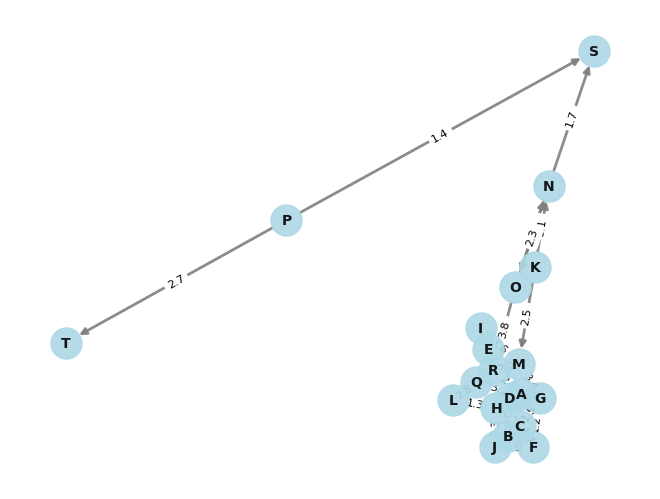

Nodes of the above graph are:-
 ['A', 'E', 'F', 'B', 'C', 'D', 'G', 'H', 'I', 'M', 'J', 'K', 'N', 'L', 'Q', 'R', 'S', 'O', 'P', 'T']
Total no of Nodes are:- 20
Edges of the above graph are:-
 [('A', 'E'), ('A', 'F'), ('E', 'A'), ('E', 'I'), ('F', 'G'), ('F', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'F'), ('D', 'G'), ('D', 'H'), ('G', 'A'), ('G', 'C'), ('H', 'A'), ('H', 'D'), ('I', 'M'), ('I', 'E'), ('M', 'G'), ('M', 'R'), ('J', 'H'), ('J', 'F'), ('K', 'M'), ('K', 'N'), ('N', 'S'), ('N', 'O'), ('L', 'Q'), ('L', 'H'), ('Q', 'A'), ('R', 'A'), ('O', 'N'), ('O', 'R'), ('P', 'S'), ('P', 'T')]
Total no of Edges are:-
 34
out Degree [('A', 3.9000000000000004), ('E', 6.3), ('F', 5.3), ('B', 6.7), ('C', 4.6), ('D', 6.3), ('G', 4.3), ('H', 5.9), ('I', 4.5), ('M', 5.4), ('J', 5.199999999999999), ('K', 5.6), ('N', 4.9), ('L', 4.1), ('Q', 3.5), ('R', 2.6), ('S', 0), ('O', 6.1), ('P', 4.1), ('T', 0)]
in Degree [('A', 14.999999999999998), ('E', 4.7), ('F', 5.699999999999999), ('B', 4.1), ('C', 

In [9]:
directed_graph(df)

In [10]:
def adjecency_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(G)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(G.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
 
    print("Sum for Node {} is {}".format(node,sum1))

In [11]:
adjecency_matrix_undirected(df)

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  2.4  2.1  0.0  0.0  0.0  2.8  3.7  0.0  0.0  0.0  0.0  0.0  0.0  3.5   
1   2.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.9  0.0  0.0  0.0  0.0  0.0  0.0   
2   2.1  0.0  0.0  4.1  1.7  0.0  1.2  0.0  0.0  0.0  1.9  0.0  0.0  0.0  0.0   
3   0.0  0.0  4.1  0.0  4.2  2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0  1.7  4.2  0.0  2.9  1.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  2.5  2.9  0.0  3.0  2.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   2.8  0.0  1.2  0.0  1.5  3.0  0.0  0.0  0.0  3.4  0.0  0.0  0.0  0.0  0.0   
7   3.7  0.0  0.0  0.0  0.0  2.2  0.0  0.0  0.0  0.0  3.3  0.0  0.0  1.3  0.0   
8   0.0  2.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.6  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  3.4  0.0  1.6  0.0  0.0  2.5  0.0  0.0  0.0   
10  0.0  0.0  1.9  0.0  0.0  0.0  0.0  3.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [12]:
def adjecency_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H=nx.DiGraph()
    H.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(H)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[i][node])
    print("Sum for Node {} is {}".format(node,sum1))

In [13]:
adjecency_matrix_directed(df)

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  2.4  0.0  0.0  0.0  0.0  2.8  3.7  0.0  0.0  0.0  0.0  0.0  0.0  3.5   
1   1.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.9  0.0  0.0  0.0  0.0  0.0  0.0   
2   2.1  0.0  0.0  0.0  1.7  0.0  0.0  0.0  0.0  0.0  1.9  0.0  0.0  0.0  0.0   
3   0.0  0.0  4.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  4.2  0.0  0.0  1.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  2.5  2.9  0.0  0.0  2.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  1.2  0.0  0.0  3.0  0.0  0.0  0.0  3.4  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  3.3  0.0  0.0  0.0  0.0  3.3  0.0  0.0  1.3  0.0   
8   0.0  3.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.6  0.0  0.0  2.5  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [14]:
def centrality_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweeness_centrality = nx.closeness_centrality(G)
    eigen_vector_centrality = nx.eigenvector_centrality(G)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [15]:
centrality_matrix_undirected(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality  \
A           0.315789              0.441860               0.441860   
E           0.105263              0.333333               0.333333   
F           0.263158              0.372549               0.372549   
B           0.157895              0.296875               0.296875   
C           0.210526              0.339286               0.339286   
D           0.210526              0.345455               0.345455   
G           0.263158              0.422222               0.422222   
H           0.210526              0.358491               0.358491   
I           0.105263              0.327586               0.327586   
M           0.210526              0.413043               0.413043   
J           0.105263              0.296875               0.296875   
K           0.105263              0.345455               0.345455   
N           0.157895              0.316667               0.316667   
L           0.105263              

In [16]:
def centrality_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(H)
    closeness_centrality = nx.closeness_centrality(H)
    betweeness_centrality = nx.closeness_centrality(H)
    #eigen_vector_centrality = nx.eigenvector_centrality(H)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    #udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [17]:
centrality_matrix_directed(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality
A           0.368421              0.434635               0.434635
E           0.210526              0.306220               0.306220
F           0.263158              0.354571               0.354571
B           0.157895              0.259109               0.259109
C           0.210526              0.269474               0.269474
D           0.263158              0.280702               0.280702
G           0.263158              0.354571               0.354571
H           0.263158              0.228368               0.228368
I           0.157895              0.228368               0.228368
M           0.210526              0.204147               0.204147
J           0.105263              0.000000               0.000000
K           0.105263              0.000000               0.000000
N           0.210526              0.105263               0.105263
L           0.105263              0.000000               0.000000
Q         

In [18]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
G = nx.Graph()
G.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.closeness_centrality(G)
eigen_vector_centrality = nx.eigenvector_centrality(G)
udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
udf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.315789,0.441860,0.441860,0.370720
E,0.105263,0.333333,0.333333,0.113006
F,0.263158,0.372549,0.372549,0.409477
B,0.157895,0.296875,0.296875,0.282975
C,0.210526,0.339286,0.339286,0.368571
D,0.210526,0.345455,0.345455,0.335275
G,0.263158,0.422222,0.422222,0.422360
H,0.210526,0.358491,0.358491,0.245179
I,0.105263,0.327586,0.327586,0.073881
M,0.210526,0.413043,0.413043,0.177661


In [19]:
def find_node_min_centarlity(udf,cent_name):
    min = 100
    node_min = -1
    for i in range(len(udf)):
        if udf[cent_name][i] < min:
            min =  udf[cent_name][i]
            node_min = i
        return node_min,min

def find_node_max_centarlity(udf,cent_name):
    max = 0
    node_max = -1
    for i in range(len(udf)):
        if udf[cent_name][i] > max:
            max =  udf[cent_name][i]
            node_max = i
        return node_max,max

In [20]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3157894736842105
0 0.3157894736842105


In [21]:
node_min,min = find_node_min_centarlity(udf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4418604651162791
0 0.4418604651162791


In [22]:
node_min,min = find_node_min_centarlity(udf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4418604651162791
0 0.4418604651162791


In [23]:
node_min,min = find_node_min_centarlity(udf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(udf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.37071982506098833
0 0.37071982506098833


In [24]:
udf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

udf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [25]:
udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = udf_min_max.columns,name = 'Eigen Vector Centrality'))
udf_min_max

<ipython-input-25-f63f0aa390aa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-25-f63f0aa390aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-25-f63f0aa390aa>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
<ipython-input-25-f63f0aa390aa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.315789,0,0.315789
Closeness Centrality,0,0.441860,0,0.441860
Betweeness Centrality,0,0.441860,0,0.441860
Eigen Vector Centrality,0,0.370720,0,0.370720


In [26]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
H = nx.DiGraph()
H.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(H)
closeness_centrality = nx.closeness_centrality(H)
betweeness_centrality = nx.closeness_centrality(H)
#eigen_vector_centrality = nx.eigenvector_centrality(H)
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = udf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
#udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.315789,0.441860,0.434635,0.370720
E,0.105263,0.333333,0.306220,0.113006
F,0.263158,0.372549,0.354571,0.409477
B,0.157895,0.296875,0.259109,0.282975
C,0.210526,0.339286,0.269474,0.368571
D,0.210526,0.345455,0.280702,0.335275
G,0.263158,0.422222,0.354571,0.422360
H,0.210526,0.358491,0.228368,0.245179
I,0.105263,0.327586,0.228368,0.073881
M,0.210526,0.413043,0.204147,0.177661


In [27]:
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = ddf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = ddf.assign(Betweeness_Centrality= betweeness_centrality.values())
#ddf = ddf.assign(Eigen_Vector_Centrality= dg_eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality
A,0.368421,0.434635,0.434635
E,0.210526,0.306220,0.306220
F,0.263158,0.354571,0.354571
B,0.157895,0.259109,0.259109
C,0.210526,0.269474,0.269474
D,0.263158,0.280702,0.280702
G,0.263158,0.354571,0.354571
H,0.263158,0.228368,0.228368
I,0.157895,0.228368,0.228368
M,0.210526,0.204147,0.204147


In [28]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3157894736842105
0 0.3157894736842105


In [29]:
node_min,min = find_node_min_centarlity(ddf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4346349745331069
0 0.4346349745331069


In [30]:
node_min,min = find_node_min_centarlity(ddf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.4346349745331069
0 0.4346349745331069


In [31]:
ddf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

ddf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [32]:
ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))
#ddf_min_max = ddf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = ddf_min_max.columns,name = 'Eigen Vector Centrality'))
ddf_min_max

<ipython-input-32-ee76da975917>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-32-ee76da975917>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-32-ee76da975917>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))


,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.315789,0,0.315789
Closeness Centrality,0,0.434635,0,0.434635
Betweeness Centrality,0,0.434635,0,0.434635
